<a href="https://colab.research.google.com/github/jong104b-kr/AIFFEL_quest_cr/blob/master/Exploration/Quest04/ExCR12_subQuest04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 운영체제와의 상호작용을 위한 모듈로, 파일 및 디렉터리 작업에 사용됨
import os
# 파일 패턴 매칭을 통해 여러 파일이나 디렉터리를 검색하는데 사용됨
import glob
# 시간 관련 함수와 기능을 제공함, 주로 프로그램 실행 시간을 측정하거나 일정 시간 대기할 때 사용함
import time

# Python Imaging Library의 약자로, 이미지 파일을 열고, 수정하고, 저장하는 등의 다양한 이미지 처리작업을 지원함
import PIL
# 이미지 시퀀스를 읽고 쓰는데 사용되는 라이브러리로, 애니메이션 생성 및 편집에도 유용함
import imageio
# 수치 계산을 위한 강력한 라이브러리로, 특히 다차원 배열 객체와 이를 다룰 수 있는 도구를 제공함
import numpy as np
# Google에서 개발한 오픈소스 머신러닝 프레임워크로 딥러닝 모델을 구축하고 훈련하는데 사용함
import tensorflow as tf
# Keras는 Tensorflow의 고수준 신경망 API로 layers 모듈은 신경망의 레이어를 정의하고 구성하는데 사용함
from tensorflow.keras import layers
# Jupytor Notebook 환경에서 미디어 출력을 표시하는데 사용함
from IPython import display
# 데이터 시각화를 위한 라이브러리로, 다양한 그래프와 플롯을 그릴 수 있음
import matplotlib.pyplot as plt

# Jupytor Notebook에서 그래프를 셀 내부에서 직접 표시하도록 설정함
%matplotlib inline

# 현재 설치된 TensorFlow버전을 출력함
print(tf.__version__)
# 현재 설치된 ImageIO 라이브러리의 버전을 출력함
print(imageio.__version__)

# 위 코드는 주로 이미지 처리와 관련된 데이터과학 또는 머신러닝 작업을 위해 필요한 라이브러리들을 설정하고,
# TensorFlow와 ImageIO의 버전을 확인하는 역할을 함. Jupytor Notebook 환경에서 실행될 것으로 예상함

2.18.0
2.37.0


In [2]:
# !는 Jupyter Notebook에서 쉘 명령어를 실행하겠다는 의미임
# mkdir는 새로운 디렉터리를 만드는 명령어
# -p 옵션은 지정한 경로의 중간 디렉토리들도 함께 생성한다는 의미임. 즉, 디렉토리가 이미 존재하지 않으면
# 새로 만들고, 존재하면 그냥 넘어감
!mkdir -p ~/aiffel/dcgan_newimage/cifar10_3/generated_samples
!mkdir -p ~/aiffel/dcgan_newimage/cifar10_3/training_checkpoints
!mkdir -p ~/aiffel/dcgan_newimage/cifar10_3/training_history

# 이 세 개의 명령어는 주로 딥러닝 모델 학습 중 생성된 샘플 이미지, 체크포인트 파일, 그리고 학습 히스토리 파일 등을
# 저장하기 위한 디렉토리 구조를 만드는데 사용함. 이러한 디렉토리 구조는 특히 GAN(Generative Adversarial Network)같은
# 모델을 학습시킬 때 유용하게 사용됨

In [3]:
# tf.keras.datasets.cifar10 는 Tensorflow의 내장된 CIFAR-10 데이터셋을 가져오는 객체
# 이 객체를 cifar10 변수에 할당하여 나중에 데이터셋을 로드할 때 사용함
cifar10 = tf.keras.datasets.cifar10
# cifar10.load_data() 메소드를 호출하여 CIFAR-10 데이터셋을 로드함
# 이 메소드는 트레이닝 데이터와 테스트 데이터를 각각 (x,y)형태의 튜플로 반환함, 여기서 x는
# 이미지 데이터이고, y는 해당 이미지의 레이블임
# 이 코드에서는 레이블을 사용하지 않기 때문에 언더스코어 _를 사용하여 레이블 부분을 무시함
# 따라서 train_x에는 트레이닝 이미지가, test_x에는 테스트 이미지가 저장됨
(train_x, _), (test_x, _) = cifar10.load_data()
# train_x의 형태(shape)를 출력함. 이는 트레이닝 데이터셋의 이미지들이 몇 개 있고
# 각 이미지의 크기가 어떻게 되는지를 보여줌. 일반적으로 CIFAR-10 데이터셋의 경우
# 각 이미지는 32x32 픽셀이며 RGB채널을 가지므로 train_x.shape는 (50000,32,32,3)과 같은 형태가 됨
train_x.shape

# 위 코드는 데이터셋을 로드하고 데이터의 구조를 파악하는데 사용됨. 주로 데이터 전처리나 모델 학습 전에
# 데이터의 형태를 확인하기 위해 사용됨

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


(50000, 32, 32, 3)

In [4]:
# train_x배열의 타입을 부동 소수점 형식(float32)으로 변환함. 이는 딥러닝 모델 학습시 정수보다 부동소수점
# 연산이 필요하기 때문임, 변환된 픽셀의 값을 정규화함(-1~1)
train_x = (train_x.astype('float32') - 127.5) / 127.5

# train_x배열에서 최대값을 찾음, 출력
print("max pixel:", train_x.max())
# train_x배열에서 최소값을 찾음, 출력
print("min pixel:", train_x.min())

# 위 과정은 이미지 데이터를 모델에 입력하기 전에 적절한 범위로 조정하는 중요한 전처리 단계.
# 대부분 딥러닝 모델은 입력 데이터가 평균 0, 분산 1인 것을 선호하므로 이와 같은 정규화가 필요함

max pixel: 1.0
min pixel: -1.0


In [5]:
# train_x 배열의 형태(shape)를 출력하는 코드
# 첫 번째 원소:전체 데이터 샘플의 수, 두 번째~세 번째 원소:각 이미지의 가로와 세로 픽셀 수, 네 번째 원소:이미지의 채널 수
train_x.shape

(50000, 32, 32, 3)

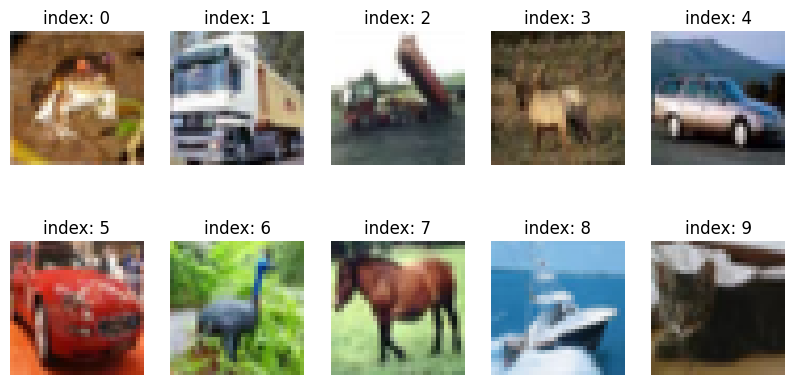

In [6]:
# plt.figure() 함수는 새로운 그래프 창을 생성함
# figsize()는 너비,높이를 설정함
plt.figure(figsize=(10, 5))

# 각 반복마다 train_x의 인덱스 하나를 선택하여 시각화함
for i in range(10):
    # 그리드 내에 위치할 서브플롯을 정의함
    plt.subplot(2, 5, i+1)
    # plt.imshow() 함수는 이미지를 표시함
    # (train_x[i]+1)/2는 정규화된 픽셀값을 0~1범위로 변환함
    plt.imshow((train_x[i] + 1) / 2) # 시각화할 때만 0~1로 변환해서 보여줌
    # plt.title() 현재 서브플롯에 제목을 추가함
    plt.title(f'index: {i}')
    # 축을 끔. 이렇게 하면 시각화할 때 더 깔끔하게 보임
    plt.axis('off')
# plt.show() 최종적으로 그래프를 화면에 표시함
plt.show()

# 위 코드는 데이터셋의 처음 10개 이미지를 그리드 형태로 시각화하여, 데이터가 제대로 로드되고 전처리되었는지
# 직관적으로 확인할 수 있게 해줌. 특히 딥러닝 모델 학습 전에 데이터를 시각적으로 검토하는 것은 매우 중요함

In [7]:
# 버퍼 사이즈는 데이터셋을 셔플링할 때 사용할 버퍼의 크기를 정의함. 여기서는 전체 트레이닝 데이터셋과 동일하며
# 이럴 경우 데이터셋이 완전히 랜덤하게 섞임
BUFFER_SIZE = 50000
# 배치 사이즈는 한 번에 모델에 입력될 데이터 샘플의 수를 정의함. 한 번의 훈련 단계에서 256개의 이미지를 동시에 처리함
BATCH_SIZE = 256

# train_x 텐서를 기반으로 TensorFlow 데이터셋 객체를 생성함. 이 객체는 텐서의 각 슬라이스(여기서는 각 이미지)를 하나의
# 요소로 갖는 데이터셋을 만듬
# .shuffle() : 데이터셋을 셔플링함. 버퍼사이즈 크기의 버퍼를 사용하여 데이터셋의 요소들을 무작위로 섞음
# 이렇게 하면 모델이 데이터를 순서에 따라 학습하는 것을 방지할 수 있음
# .batch() : 셔플된 데이터셋을 지정된 배치 크기로 묶음. 이는 모델이 한 번의 훈련 단계에서 256개의 이미지를 동시에
# 처리할 수 있도록 함.
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [8]:
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    # units은 8x8x256, 편향은 사용하지 않음,(배치 정규화가 뒤따르기 때문일 가능성이 큼) 입력 값의 크기는 100차원 벡터
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    # 배치 정규화 사용 - 각 배치의 입력을 정규화하여 학습을 안정화하고 가속화하는데 도움을 줌. 이는 깊은 네트워크에서 유용함.
    model.add(layers.BatchNormalization())
    # LeakyReLU 활성화 함수 사용 - 일반적인 ReLU함수의 변형으로, 음수 입력에 대해 작은 기울기를 허용하여 죽은 뉴런(dead neuron)문제를 완화함
    model.add(layers.LeakyReLU())

    # Second: Reshape layer - 이 레이어는 이전의 평탄화된 텐서를 8x8 크기의 256채널을 가진 3D텐서로 변환함
    # 이는 후속 컨볼루션 레이어에 적합한 형태로 데이터를 준비함
    model.add(layers.Reshape((8, 8, 256))) # Reshape 크기 조정

    # Third: Conv2DTranspose layer
    # 커널 크기는 5, stride는 1, 패딩은 사용, 편향은 사용하지 않음
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    # 배치 정규화 사용
    model.add(layers.BatchNormalization())
    # LeakyReLU 활성화 함수 사용
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    # 커널 크기는 5, stride는 2, 패딩은 사용, 편향은 사용하지 않음
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    # 배치 정규화 사용
    model.add(layers.BatchNormalization())
    # LeakyReLU 활성화 함수 사용
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer, 활성화 함수로 tanh를 사용함. 이는 출력값의 범위를 -1에서 1사이로 유지하기 위함
    model.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

    # 전반적으로 이 생성자 모델은 GAN(Generative Adverserial Network)의 생성자 부분으로 보이며, 입력 노이즈 벡터를 받아
    # 실제 이미지를 생성하는 역할을 함

In [9]:
# 함수호출, 생성자 모델을 생성함. 여러 레이어를 포함한 생성 모델을 반환함
# 이 모델 객체를 generator변수에 할당하여 이후 모델 학습 및 예측 과정에서 사용할 수 있게 함
generator = make_generator_model()

# summary()메소드는 모델의 구조를 요약하여 출력함. 이 메소드는 모델의 각 레이어에 대한 정보(레이어의 유형,출력 형태,파라미터 수 등)
# 를 제공하여 모델의 전체적인 구조를 쉽게 이해할 수 있게 해줌
# 요약에는 입력과 출력의 형태, 레이어의 이름, 파라미터 수 등이 포함되어 있어 모델의 복잡도와 각 레이어의 기여도를 평가하는데 유용함
generator.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16384)          │     1,638,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16384)          │        65,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 3)      │         4,800 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,733,504 (10.43 MB)

 Trainable params: 2,700,352 (10.30 MB)

 Non-trainable params: 33,152 (129.50 KB)

In [10]:
# tf.random.normal()함수는 주어진 형태의 난수 생성, 1개 샘플과 100차원의 벡터를 의미함
# 이는 생성자의 입력으로 사용될 랜덤 노이즈 벡터
# 결과적으로 noise변수에는 정규 분포들을 따르는 랜덤 값들로 이루어진 1x100텐서가 저장됨
noise = tf.random.normal([1, 100])

# generator는 앞서 정의한 생성 모델을 의미함
# generator(noise,training=False)는 생성 모델에 랜덤 노이즈 벡터를 입력으로 주어 이미지를 생성함
# training=False는 모델을 학습 모드가 아닌 추론 모드로 동작시킨다는 의미, 즉 배치 정규화 등의 기법이
# 학습 시와 다르게 동작하게 됨
# 이 코드의 실행 결과는 생성된 이미지가 generated_image 변수에 저장됨
generated_image = generator(noise, training=False)
# 생성된 이미지의 형태(Shape)를 출력함. 일반적으로 생성된 이미지는 32x32 픽셀 크기에 3개의 채널(RGB)을 가짐
# 따라서 출력은 (32,32,3)이 될 것임
generated_image.shape

# 위 코드는 생성 모델을 사용하여 실제 이미지를 생성하는 과정을 보여줌. 생성적 대립 신경망(GAN)에서 생성자는
# 랜덤 노이즈를 입력받아 실제 데이터와 유사한 새 데이터를 생성하는 역할을 함. 이 예제에서는 모델이 랜덤 노이즈를 받아
# 이미지를 생성하고, 그 결과를 확인함

TensorShape([1, 32, 32, 3])

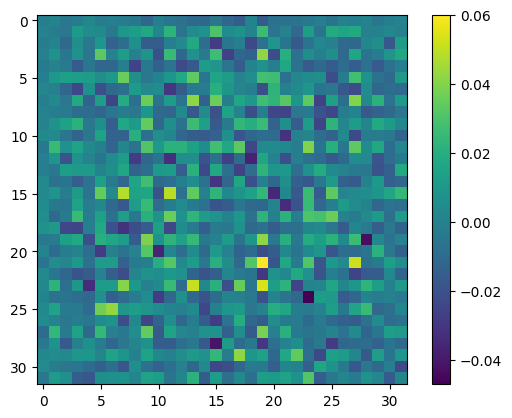

In [11]:
# 생성된 이미지를 시각화하는 과정
# plt.imshow()함수는 이미지를 표시함, generated_image[0,:,:,0]는 생성된 이미지 텐서에 첫 번째 이미지의
# 첫 번째 채널(일반적으로 R)을 선택함. : 연산자는 해당 차원의 모든 요소를 선택하라는 의미임.
# 이렇게 하면 32x32 픽셀 크기의 흑백 이미지가 선택됨
plt.imshow(generated_image[0, :, :, 0])
# plt.colorbar()는 이미지에 컬러바를 추가함. 이는 이미지의 픽셀값에 대한 정보를 제공함
# 컬러바는 특히 색상이 있는 이미지에서 유용하지만, 이 경우에는 흑백 이미지이므로 컬러바가 직접적으로
# 큰 의미를 갖지는 않음. 하지만 습관적으로 추가하는 경우가 많음
plt.colorbar()
# plt.show()는 그래프를 화면에 표시함, 이 함수를 호출하면 imshow로 지정한 이미지가 실제로 화면에 나타나게 됨
plt.show()

# 이 코드는 생성된 이미지를 시각적으로 확인하기 위한 간단한 방법임. GAN모델의 생성자가 생성한 이미지를
# 눈으로 직접 확인함으로써, 생성된 이미지의 품질과 생성 모델의 성능을 직관적으로 평가할 수 있음
# 이 과정은 모델의 학습 상태를 점검하거나, 생성된 이미지가 원하는 특성을 가지고 있는지를 확인하는데 유용함

In [12]:
# 이 코드는 판별자 모델을 정의하는 함수를 구현하고 있음
def make_discriminator_model():
    # tf.keras.Sequential()을 사용하여 신경망 모델을 생성함. Sequential모델은 층(layer)을
    # 순차적으로 쌓을 수 있는 간단한 모델
    model = tf.keras.Sequential()
    # 첫 번째 레이어로 2D 컨볼루션 레이어를 추가함, 64는 필터수, (5,5)는 커널 크기, stride=(2,2)는
    # 커널이 이미지 위를 이동하는 간격을 설정하며, 이는 공간적 다운샘플링을 유도함
    # padding='same'은 컨볼루션 연산 후 출력의 높이와 너비를 입력과 동일하게 유지하기 위해
    # 패딩을 추가함, input_shape=[32,32,3]은 입력 이미지의 형태를 정의하며 32x32픽셀 크기에
    # 3개의 채널(RGB)을 가짐
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[32, 32, 3]))

    # 배치 정규화 레이어를 추가함, 이는 각 배치의 입력을 정규화하여 학습을 안정화하고
    # 속도를 높이는데 도움을 줌
    model.add(layers.BatchNormalization())
    # Leaky ReLU활성화 함수를 추가함, 이는 일반적인 ReLU의 변형으로 음수 입력에 대해서도
    # 작은 기울기를 허용하여 "죽은 뉴런"문제를 방지함
    model.add(layers.LeakyReLU())
    # 드롭아웃 레이어를 추가함, 이번에는 128개의 필터를 사용하며 마찬가지로 5x5커널과
    # 2x2스트라이드를 사용함
    model.add(layers.Dropout(0.3))
    # 두 번째 컨볼루션 레이어를 추가함, 128개의 필터 사용, 5x5 커널과 2x2 스트라이드 사용
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # 플랫튼 레이어를 추가하여 이전의 3D 텐서(높이,너비,채널)를 1D 벡터로 변환함. 이는 완전 연결 레이어로 전달하기 위한
    # 준비단계임
    model.add(layers.Flatten())
    # 마지막 레이어로 단일 뉴런을 가진 밀집 레이어를 추가함, 이 레이어는 최종적으로 이미지가
    # 진짜인지 가짜인지를 나타내는 스칼라 값을 출력함
    model.add(layers.Dense(1))

    return model

    # 위 판별자 모델은 생성된 이미지와 실제 이미지를 구분하는 역할을 함, 생성적 대립 신경망(GAN)에서
    # 판별자는 입력 이미지가 실제 데이터인지 아니면 생성된 데이터인지 판단하는 역할을 하며 이 모델은
    # 그러한 판단을 내리기 위한 구조를 갖추고 있음

In [13]:
# make_discriminator_model() 함수를 호출하여 판별 모델을 생성함, 이 함수는 정의한 대로
# 여러 레이어를 포함한 판별 모델을 반환함, 이 모델 객체를 discriminator변수에 할당하여
# 이후 모델 학습 및 평가 과정에서 사용할 수 있게 함
discriminator = make_discriminator_model()

# summary() 메소드는 모델의 구조를 요약하여 출력함, 이 메소드는 각 레이어에 대한
# 정보(레이어의 유형,출력 형태,파라미터 수 등)를 제공하여 모델의 전체적인 구조를 쉽게 이해할 수 있게 해줌
# 요약에는 입력과 출력의 형태, 레이어의 이름, 파라미터 수 등이 포함되어 있어 모델의 복잡성을 평가하고
# 학습시 필요한 자원을 예측하는데 유용함
discriminator.summary()

# 이 코드는 판별 모델을 정의한 후 그 구조를 확인하기 위한 단계임, GAN(Generative Adverserial Network)의 판별자는
# 생성자가 만든 이미지와 실제 이미지를 구분하는 역할을 하며 이 코드는 그 판별자의 구조를 시각적으로 이해하고
# 디버깅하거나 수정할 준비를 마치는 과정. 모델의 요약 정보를 통해 각 레이어의 출력 크기와 파라미터 수 등을
# 확인할 수 있어, 모델의 학습과 성능 튜닝에 도움이 됨

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,753 (854.50 KB)

 Trainable params: 218,369 (853.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [14]:
# 이 코드는 생성된 이미지에 대해 판별 모델을 사용하여 그 이미지가 실제인지 가짜인지 평가하는 과정을
# 담고 있음.
# discriminator()은 앞서 정의하고 생성한 판별 모델을 의미함
# generated_image는 생성자 모델에 의해 생성된 이미지임, discriminator(generated_image,training=False)는 판별 모델에
# 생성된 이미지를 입력으로 주어, 이 이미지가 실제 이미지인지 여부를 평가함
# training=False는 모델을 학습 모드가 아닌 추론 모드로 동작시킨다는 의미임, 이는 배치 정규화와
# 드랍아웃 같은 기법이 학습 시와 다르게 동작하게 만듬
# 이 함수의 호출결과는 decision변수에 저장되며 이는 생성된 이미지에 대한 판별모델의 예측결과를 나타냄
# 일반적으로 이 값은 0에 가까우면 가짜, 1에 가까우면 진짜로 간주됨
decision = discriminator(generated_image, training=False)
decision

# 위 코드는 생성된 이미지에 대한 판별자의 평가를 수행하는 것으로 GAN의 학습 과정에서 중요한 부분
# 판별자는 생성자가 만든 이미지가 얼마나 실제 데이터와 유사한지 평가하며 이 평가를 통해 생성자는
# 점점 더 실제와 유사한 이미지를 생성하도록 학습하게 됨. 이 과정을 통해 GAN은 생성된 이미지의 품질을
# 점차 향상시킴

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00613334]], dtype=float32)>

In [15]:
# Wasserstein loss 함수 정의
# generator_loss() 함수는 생성자의 손실을 계산함, fake_output는 판별자가 생성된 이미지를 입력으로 받았을 때
# 출력을 의미함
def generator_loss(fake_output):
    # 생성자는 판별자가 가짜 이미지에 대해 높은 점수(score)를 주도록 학습 (즉, -fake_output 평균을 최소화)
    # 이 함수는 판별자가 생성된 이미지를 실제 이미지로 착각하도록 유도하는 것을 목표로 함
    # fake_output의 평균을 구함
    return -tf.reduce_mean(fake_output)

# 판별자 손실함수
# discriminator_loss함수는 판별자의 손실을 계산함
# real_output는 판별자가 실제 이미지를 입력으로 받았을 때의 출력
# fake_output는 판별자가 생성된 이미지를 입력으로 받았을 때 출력
def discriminator_loss(real_output, fake_output):
    # 판별자는 실제 이미지 점수(real_output)는 높이고, 가짜 이미지 점수(fake_output)는 낮추도록 학습
    # Wasserstein distance 추정: E[D(fake)] - E[D(real)]
    # 이 함수는 판별자가 실제 이미지에 대해서는 높은 점수를 생성된 이미지에 대해서는 낮은 점수를
    # 주도록 학습하는 것을 목표로 함
    # tf.reduce_mean(fake_output)는 생성된 이미지에 대한 평균점수, tf.reduce_mean(real_output)는 실제
    # 이미지에 대한 평균점수, 두 값의 차이를 반환함으로써 판별자는 실제 데이터와 생성된 데이터를 더 잘 구분하려고
    # 학습하게 됨
    return tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)

# 위 두 손실함수는 생성적 대립 신경망(GAN)의 학습과정에서 중요한 역할을 함. 생성자는 판별자를 속이기 위해
# 점점 더 실제와 유사한 이미지를 생성하려고 하고, 판별자는 생성된 이미지와 실제 이미지를 더 잘 구분하려고 노력함
# 이 경쟁적인 과정을 통해 GAN은 고품질의 이미지를 생성할 수 있게 됨. 이 방식은 특히 Wasserstein GAN(WGAN)에서
# 자주 사용되며 모델의 학습 안정성을 높이는데 기여함

In [16]:
# Gradient Penalty 계산 함수
# GANs의 학습안정성을 높이기 위해 사용되는 기법으로 생성자와 판별자간의 경쟁을
# 더 부드럽게 만들어 줌.
# (real_images, fake_images, discriminator 모델을 입력으로 받음)
def gradient_penalty(real_images, fake_images, discriminator):
    # 엡실론은 0과 1 사이의 랜덤한 값을 생성함, 이 값은 real_images와 fake_images 사이의
    # 선형보간(linear interpolation)을 수행하는데 사용함
    # real_images.shape[0]는 실제 이미지와 배치크기와 동일하게 설정하여
    # 각 이미지에 대해 개별적으로 보간을 수행함
    epsilon = tf.random.uniform([real_images.shape[0], 1, 1, 1], 0.0, 1.0)
    # interpolated_images 는 실제 이미지와 생성된 이미지 사이의 보간된 이미지를 생성함
    # 이 보간된 이미지는 epsilon에 의해 실제 이미지와 생성된 이미지 사이에서 랜덤하게 위치함
    interpolated_images = epsilon * real_images + (1 - epsilon) * fake_images

    # tf.GradientTape를 사용하여 그레이디언트를 기록함, 이는 텐서플로에서 자동미분을 수행하기 위한 도구
    with tf.GradientTape() as tape:
        # interpolated_images에 대한 변화를 추적하도록 Gradient Tape에게 지시함
        tape.watch(interpolated_images)
        # 판별자에 보간된 이미지를 입력하여 예측을 얻음,training=True는 판별자가 학습모드에서 동작하도록 설정함
        predictions = discriminator(interpolated_images, training=True)

    # 보간된 이미지에 대한 예측의 그레이디언트를 계산함, 이 그래이디언트는 판별자의 결정 경계의 기울기를 나타냄
    gradients = tape.gradient(predictions, [interpolated_images])[0]
    # 그래이디언트의 L2 노름을 계산함, 이는 각 보간된 이미지에 대한 그래이디언트의 크기를 나타냄
    norm = tf.sqrt(tf.reduce_sum(tf.square(gradients), axis=[1, 2, 3]))
    # Gradient Penalty를 계산함, 목표는 그래이디언트의 크기가 1이 되도록 하는 것이며 이 값에서 벗어나는 정도를
    # 최소화하는 것이 목표임
    gp = tf.reduce_mean((norm - 1.0) ** 2)
    # 계산된 Gradient Penalty값을 반환함
    return gp

# 위 함수는 WGAN-GP( Wasserstein GAN with Gradient Penalty)에서 사용되며, 생성자와 판별자의 경쟁을
# 더 부드럽게 만들어주고, 학습의 안정성을 크게 향상시킴. Gradient Penalty는 판별자의 그래디언트가
# 너무 크지 않도록 제한하며, 생성자가 더 안정적으로 학습할 수 있도록 도와줌

In [17]:
# Optimizer 정의 (WGAN-GP에서 자주 사용되는 설정)
# 학습률 및 beta 값 조정 가능
# learning_rate : 1e-4, Adam 옵티마이저의 학습률을 설정, 이는 기본적인 설정으로
# 학습속도를 조절하는 중요한 파라미터
# beta_1, beta_2 : Adam 옵티마이저의 첫 번째와 두 번째 모멘텀 베타값을 설정
# 이 값들은 옵티마이저가 그래디언트의 지수 이동평균을 계산할 때 사용됨
# GP_WEIGHT : Gradient Penalty의 가중치를 10.0으로 설정함, 이는 Gradient Penalty손실의
# 중요도를 조절하는 하이퍼 파라미터
LEARNING_RATE = 1e-4
BETA_1 = 0.5
BETA_2 = 0.9
GP_WEIGHT = 10.0 # Gradient Penalty 가중치 (람다 값)

# 생성자 옵티마이저의 정의, Adam으로 설정, 위에서 정의한 학습률과 베타값을 사용하여
# 옵티마이저를 초기화함
generator_optimizer = tf.keras.optimizers.Adam(
    learning_rate=LEARNING_RATE, beta_1=BETA_1, beta_2=BETA_2
)

# 판별자 옵티마이저 정의, 판별자의 옵티마이저 역시 adam으로 설정, 동일한 학습률과
# 베타값을 사용하여 옵티마이저를 초기화함
discriminator_optimizer = tf.keras.optimizers.Adam(
    learning_rate=LEARNING_RATE, beta_1=BETA_1, beta_2=BETA_2
)

# Noise 및 Seed는 그대로 둠
# 노이즈와 시드 설정, 생성자에 입력되는 랜덤 노이즈 벡터의 차원, 여기서는 100차원으로 설정함
# 한 번에 생성할 이미지 개수를 16개로 설정, 16개의 랜덤 노이즈 벡터를 생성함, 이 벡터들은 생성자의 입력으로
# 사용되어 다양한 이미지를 생성하는데 사용됨
noise_dim = 100
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])

# 위 코드는 GAN의 학습을 위한 기본 설정을 완료하는 단계임, Adam 옵티마이저는 딥러닝 모델학습에
# 널리 사용되는 옵티마이저로, 학습률을 적절히 조절함으로써 모델이 빠르게 수렴할 수 있도록 도와줌
# Gradient Penalty의 가중치를 설정함으로써 판별자의 그래이디언트가 너무 커지지 않도록 제어하고,
# 학습의 안정성을 높임, 이 설정들은 WGAN-GP에서 자주 사용되며 모델의 학습을 더욱 안정적이고 효과적으로 만듬

In [18]:
# def discriminator_accuracy(real_output, fake_output):
#     real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
#     fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
#     return real_accuracy, fake_accuracy

In [19]:
# generator_optimizer = tf.keras.optimizers.Adam(1e-4)
# discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [20]:
# noise_dim = 100
# num_examples_to_generate = 16

# seed = tf.random.normal([num_examples_to_generate, noise_dim])
# seed.shape

In [21]:
# GAN의 학습 단계를 정의하는 함수, 텐서플로의 tf.function 데코레이터를 사용하여 그래프 모드로 컴파일 되어 있음.

# 이 데코레이터는 함수를 텐서플로의 그래프모드로 컴파일함. 이는 텐서플로가 함수의 실행을 최적화하고
# GPU에서 병렬 실행을 가능하게 함
@tf.function
# train_step함수는 한번의 학습단계(미니배치)를 정의함, images는 현재 미니배치의 실제 이미지들.
def train_step(images):
    # 실제 입력 이미지 배치의 크기를 가져옵니다. 이는 images텐서의 첫 번째 차원(배치 크기)의 크기를 나타냄
    current_batch_size = tf.shape(images)[0]

    # 실제 배치 크기에 맞춰 노이즈를 생성합니다. 이 노이즈 벡터는 생성자의 입력으로 사용됨.
    noise = tf.random.normal([current_batch_size, noise_dim]) # BATCH_SIZE 대신 current_batch_size 사용

    # 두 개의 GradientTape 객체를 생성함, 하나는 생성자, 다른 하나는 판별자의 그래디언트를 기록함.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # 생성된 이미지도 current_batch_size 크기를 갖게 됩니다. 생성자에 노이즈를 입력하여 가짜 이미지를 생성함
        generated_images = generator(noise, training=True)

        # 판별자는 실제 이미지와 생성된 이미지에 대한 출력을 생성함
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        # WGAN-GP Loss 계산, 생성자의 손실을 계산함
        gen_loss = generator_loss(fake_output)
        # 판별자의 기본손실을 계산함
        disc_loss_base = discriminator_loss(real_output, fake_output)
        # gradient_penalty 함수에는 이제 동일한 배치 크기의 이미지가 전달됩니다.
        # gradient_penalty를 계산함
        gp = gradient_penalty(images, generated_images, discriminator)
        # 최종 판별자의 손실을 계산함, 여기에 Gradient Penalty를 추가함
        disc_loss = disc_loss_base + gp * GP_WEIGHT # Gradient Penalty 적용

    # Gradient 계산
    # 생성자의 그래디언트를 계산함
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # 판별자의 그래디언트를 계산함
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # 모델 학습 (Optimizer에 Gradient 적용)
    # 생성자의 변수에 그래디언트를 적용하여 모델을 업데이트함
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    # 판별자의 변수에 그래디언트를 적용하여 모델을 업데이트함
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    # Accuracy 대신 Loss 값들을 리턴
    # 생성자와 판별자의 손실값을 반환함, 이는 학습 진행상황을 모니터링하는데 사용될 수 있음
    return gen_loss, disc_loss

# 위 함수는 GAN의 학습과정을 자동화하는 핵심부분임. 각 학습단계에서 생성자와 판별자의 손실을 계산하고
# 그에 따른 그래이디언트를 계산하여 모델을 업데이트함. 그래이디언트 패널티를 포함하여 판별자가 너무 급격하게
# 변화하지 않도록 제어하며, 학습의 안정성을 높임. 이 함수는 텐서플로의 동적 그래프 실행을 통해 효율적으로 실행됨

In [22]:
# 이 코드는 주어진 에포크와 반복마다 생성된 이미지를 저장하는 함수
# model은 생성자 모델, epoch는 현재 학습 중인 에포크 번호
# it는 현재 반복 번호, sample_seeds는 생성자에 입력으로 사용될 랜덤 시드들의 값
def generate_and_save_images(model, epoch, it, sample_seeds):

    # model에 sample_seeds를 입력하여 이미지 생성, training=False는 모델을 추론모드로 설정하여
    # 드롭아웃 및 배치정규화가 학습 시와 다르게 동작하도록 함
    # predictions는 생성된 이미지들의 텐서
    predictions = model(sample_seeds, training=False)

    # 이미지 그리기
    # 새로운 그래프 창을 생성하고 그 크기를 4x4 서브플롯을 담을 수 있도록 설정함
    fig = plt.figure(figsize=(4, 4))
    # predictions 텐서의 각 이미지를 순회함, 이 경우 16개의 이미지가 생성됨(4x4 그리드)
    for i in range(predictions.shape[0]):
        # 4x4 그리드의 i+1번째 위치에 현재 이미지를 추가함
        plt.subplot(4, 4, i+1)
        # i번째 생성된 이미지를 회색조로 표시함, 여기서는 첫 번째 채널만 사용함
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        # 축을 제거하여 이미지만 깔끔하게 표시되도록 함
        plt.axis('off')

    # 생성된 이미지를 파일로 저장함
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10_3/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    # 그래프를 화면에 표시하고 그래프 객체를 닫음
    plt.show()

# 이 함수는 학습 중인 GAN 모델의 성능을 시각적으로 추적하기 위해 사용됨. 주기적으로 생성된 이미지를
# 저장함으로써 모델이 시간이 지남에 따라 어떻게 개선되는지를 쉽게 확인할 수 있음. 특히, GAN의 학습이
# 잘 진행되고 있는지를 시각적으로 평가하는데 매우 유용함

In [23]:
# matplotlib.pylab 모듈에서 rcParams를 가져옴, rcParams는 Matplotlib의 기본설정을
# 변경하는데 사용됨
from matplotlib.pylab import rcParams
# figure.figsize설정을 변경하여 그래프의 크기를 너비 15, 높이 6으로 설정함, 이는 생성되는
# 플롯의 크기를 조절하는데 사용됨
rcParams['figure.figsize'] = 15, 6

# draw_train_history함수는 학습 히스토리를 시각화함
# history는 각 에포크마다의 손실값을 담고 있는 사전, 보통 gen_loss와 disc_loss 키를 가짐
# epoch는 현재 학습 중인 에포크 번호
def draw_train_history(history, epoch):
    # summarize history for loss
    # 생성자의 손실을 플롯함
    plt.plot(history['gen_loss'])
    # 판별자의 손실을 플롯함, 이 손실에는 Gradient Penalty가 포함된 값임
    plt.plot(history['disc_loss'])
    # 플롯의 제목, y축 레이블, x축 레이블을 설정
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('batch iters')
    # 범례(legend)를 추가하여 두 개의 선이 각각 무엇인지 나타내는지 설명함
    # disc_loss는 Gradient Penalty가 적용된 판별자의 손실을 의미함
    plt.legend(['gen_loss', 'disc_loss (with GP)'], loc='upper left')

    # Accuracy plot 제거
    # 그래프를 파일로 저장함
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10_3/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    # 그래프를 화면에 표시하고 그래프 객체를 닫음
    plt.show()

# 위 함수는 GAN의 학습과정을 시각적으로 추적하는데 사용됨, 주기적으로 손실 그래프를 저장함으로써
# 생성자와 판별자의 손실이 어떻게 변화하는지를 쉽게 확인할 수 있음, 이는 모델의 학습 상태를 평가하고,
# 필요에 따라 하이퍼 파라미터를 조정하는데 도움을 줌

In [24]:
# 체크포인트 파일이 저장될 디렉토리 설정
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10_3/training_checkpoints'

# 체크포인트 파일의 이름을 정의함, os.path.join함수는 주어진 경로를 결합하여 올바른 파일 경로를 만듬
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
# 체크포인트 객체 생성, 모델의 상태를 저장함, 아래는 전달되는 인자들이며 이 객체들이 체크포인트에 포함되도록 함
# 체크포인트는 모델의 파라미터 뿐만 아니라 옵티마이저의 상태도 저장함, 이는 학습을 중단했다가 재개할 때 유용함
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)
# 이 코드는 모델 학습 중에 중요한 상태를 저장하고 필요할 때 이를 복원할 수 있도록 함. 체크포인트는 특히
# 긴 학습과정 중에 컴퓨터가 멈추거나 실패할 경우에도 학습을 재개할 수 있게 해주며 모델의 성능을 지속적으로
# 저장할 수 있는 방법. 텐서플로의 체크포인트 클래스는 모델의 모든 관련 요소를 함께 저장하여 학습을 중단하고
# 재개할 때 일관성을 유지할 수 있도록 도와줌

In [25]:
# 이 코드는 GAN모델의 전체 학습과정을 관리하는 함수
def train(dataset, epochs, save_every):
    # 학습 시작 시간을 기록함, 이는 전체 학습 과정에 걸린 시간을 측정하는데 사용됨
    start = time.time()
    # history 딕셔너리에서 accuracy 관련 키 제거, 히스토리 딕셔너리를 초기화하여
    # 각 에포크마다 생성자 및 판별자 손실을 저장할 공간을 만듬
    history = {'gen_loss':[], 'disc_loss':[]}

    # 주어진 에포크만큼 반복하여 각 에포크를 진행함
    for epoch in range(epochs):
        # 현재 에포크의 시작시간을 기록함
        epoch_start = time.time()
        # 데이터셋의 각 미니배치에 대해 반복함
        for it, image_batch in enumerate(dataset):
            # train_step에서 accuracy 반환값 제거
            # 트레인 스텝 함수를 호출하여 한 번의 학습단계를 수행하고, 생성자와 판별자의 손실을 계산함
            gen_loss, disc_loss = train_step(image_batch)
            # 계산된 손실값을 history딕셔너리에 추가함
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            # accuracy history 추가 제거

            # 매 50번째 반복마다 중간 결과를 시각화함
            if it % 50 == 0:
                # 이전 출력을 지우고 새로운 출력을 대기함
                display.clear_output(wait=True)
                # 현재 에포크와 반복에 해당하는 이미지를 생성하고 저장함
                generate_and_save_images(generator, epoch+1, it+1, seed)
                # 현재 에포크와 반복에 해당하는 이미지를 생성하고 저장함
                # (주석처리된) 손실값을 출력할 수도 있음
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                # Loss 값 출력 (필요시 추가)
                # print(f'gen_loss: {gen_loss:.4f}, disc_loss: {disc_loss:.4f}')
                # 현재 에포크에 걸린 시간을 출력함
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        # 특정 간격마다 체크포인트를 저장함
        if (epoch + 1) % save_every == 0:
            # 체크포인트 객체를 파일로 저장함
            checkpoint.save(file_prefix=checkpoint_prefix)

        # 최종 결과를 시각화하기 전에 이전 출력을 지움
        display.clear_output(wait=True)
        # 마지막 에포크에 해당하는 이미지를 생성하고 저장함
        generate_and_save_images(generator, epochs, it, seed) # it 대신 it+1 사용 가능
        # 전체 학습 과정에 걸린 시간을 출력함
        print('Time for training : {} sec'.format(int(time.time()-start)))

        # 수정된 draw_train_history 호출, 지금까지의 손실 히스토리를 그려서 저장함
        draw_train_history(history, epoch+1) # epoch 대신 epoch+1

# 위 함수는 GAN 모델의 학습을 전체적으로 관리하며 각 에포크마다 모델을 업데이트하고 중간 및 최종결과를
# 저장하며 학습 히스토리를 시각화함, 또한 체크포인트를 저장하여 학습을 중단하고 재개할 수 있도록 함
# 위 구조는 GAN의 학습 과정을 체계적으로 관리하고 모니터링하는데 매우 유용함

In [26]:
save_every = 1 # 체크포인트를 매 에포크마다 저장하도록 설정함
EPOCHS = 5 # 전체학습을 5번의 에포크로 진행하도록 설정, 이는 모델이 5번 반복학습함을 의미

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")
# 위 설정은 모델학습을 위한 기본환경을 준비하는 단계임, 체크포인트 저장빈도를 설정함으로써
# 학습 중간에 모델의 상태를 저장, 에포크 수를 설정하여 학습을 몇 번 반복할지 결정함.
# 마지막으로 사용가능한 GPU 디바이스 확인

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

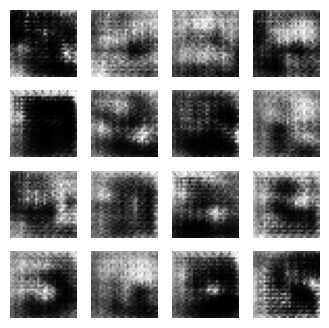

Time for training : 126 sec


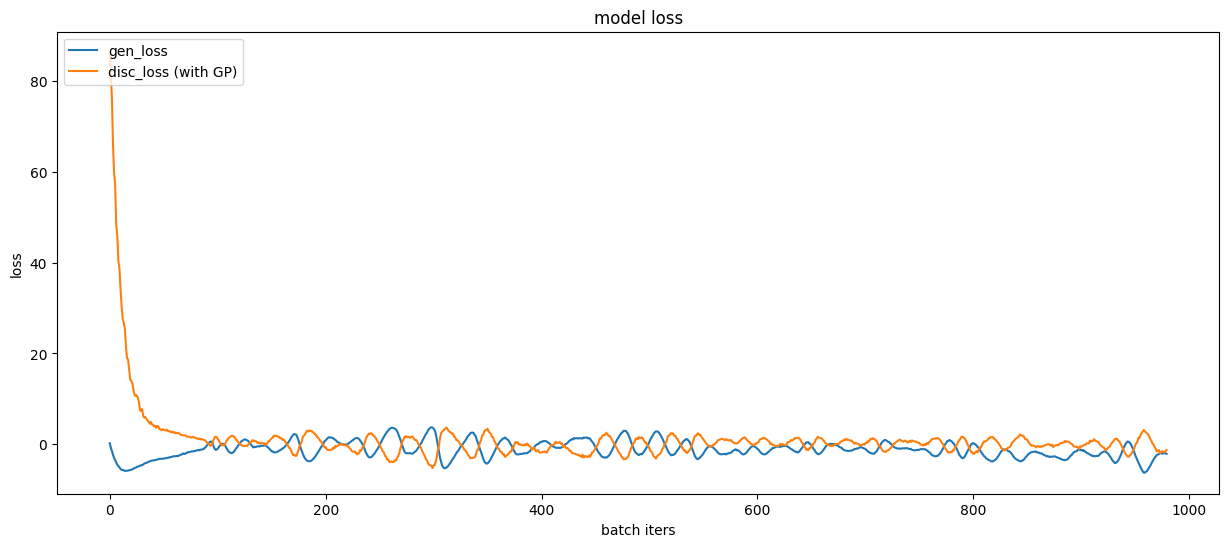

CPU times: user 52.5 s, sys: 9.31 s, total: 1min 1s
Wall time: 2min 7s


In [27]:
# 이 명령어는 셀의 실행시간을 측정하여 전체 학습 과정이 얼마나 걸리는지를 보여줌
%%time
# train함수를 호출하여 GAN모델을 학습시킴, train_dataset는 앞서 준비한 데이터셋 객체
# 에포크는 전체 학습을 수행할 에포크수, save_every는 체크포인트를 저장할 빈도
# 이 함수는 생성자와 판별자 사이의 손실을 계산하고 모델을 업데이트하며 중간 및 최종 결과를
# 시각화하고 저장함
train(train_dataset, EPOCHS, save_every)

# 위 코드는 전체 학습 프로세스를 실행하는 명령어로 정의된 함수와 설정에 따라 GAN모델을 학습시키고
# 학습결과를 저장하며 학습과정을 모니터링함.

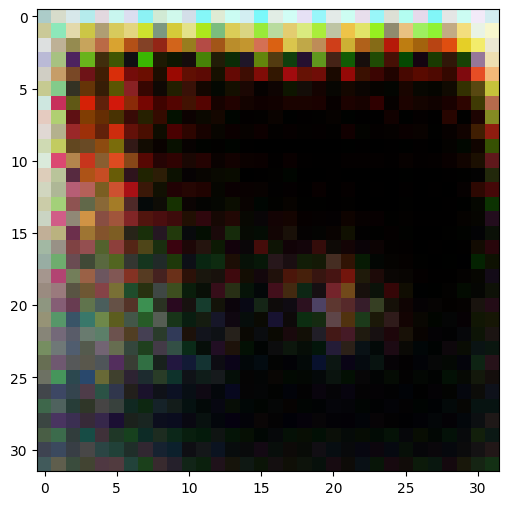

In [28]:
# 체크포인트 디렉터리를 설정함
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10_3/training_checkpoints'

# 최신 체크포인트 찾기
latest = tf.train.latest_checkpoint(checkpoint_dir)
# 체크포인트 복원
checkpoint.restore(latest)

# 생성자와 판별자 모델 추출
generator = checkpoint.generator
discriminator = checkpoint.discriminator

# 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 봅니다.
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

np_generated = generated_image.numpy()
np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
np_generated = np_generated.astype(int)
plt.imshow(np_generated[0])
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것입니다.

In [29]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10_3/cifar10_dcgan_3.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10_3/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/cifar10_3_dcgan.gif

<ipython-input-29-132c31ddec62>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-29-132c31ddec62>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


ls: cannot access '/root/aiffel/dcgan_newimage/cifar10/cifar10_3_dcgan.gif': No such file or directory
